# Heart Disease Prediction using Machine learning
### Heart Disease UCI
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [68]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv("heart.csv")

<table>
<tr><td>
 
|Feature|Description | 
|--|--|
|age| in years|
|sex|(1 = male; 0 = female)|
|cp|chest pain type|
|trestbps|resting blood pressure (in mm Hg)|
|chol|serum cholestoral in mg/dl|
|fbs|(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)|

</td>    
<td>

|Feature|Description |
|--|--|
|thalach| maximum heart rate achieved|
|exang |exercise induced angina (1 = yes; 0 = no)|
|oldpeak| ST depression induced by exercise relative to rest|
|slope| the slope of the peak exercise ST segment|
|ca| number of major vessels (0-3) colored by flourosopy|
|thal| 3 = normal; 6 = fixed defect; 7 = reversable defect|
|target| 1 or 0 |
</td></tr> </table>

In [70]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [72]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [73]:
df = df.drop(df[df.thal == 0].index)

In [74]:
df['ca'].value_counts()

0    173
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [75]:
df = df.drop(df[df.ca == 4].index)

In [76]:
df['restecg'].value_counts()

1    147
0    145
2      4
Name: restecg, dtype: int64

In [77]:
df = df.drop(df[df.restecg == 2].index)

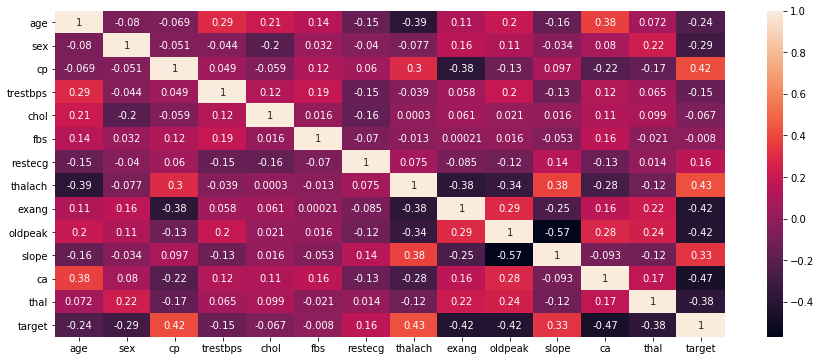

In [78]:
corrMatrix = df.corr()
plt.subplots(figsize=(15,6))
sns.heatmap(corrMatrix, annot=True)
plt.show()

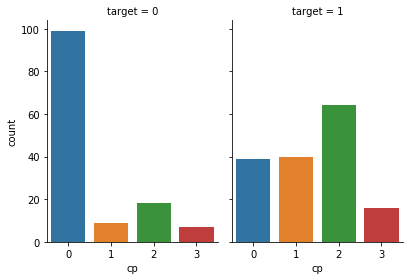

In [79]:
g = sns.catplot(x="cp", col="target",data=df, kind="count",height=4, aspect=.7);

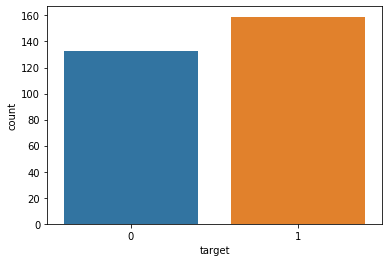

In [80]:
sns.countplot(x='target', data=df)

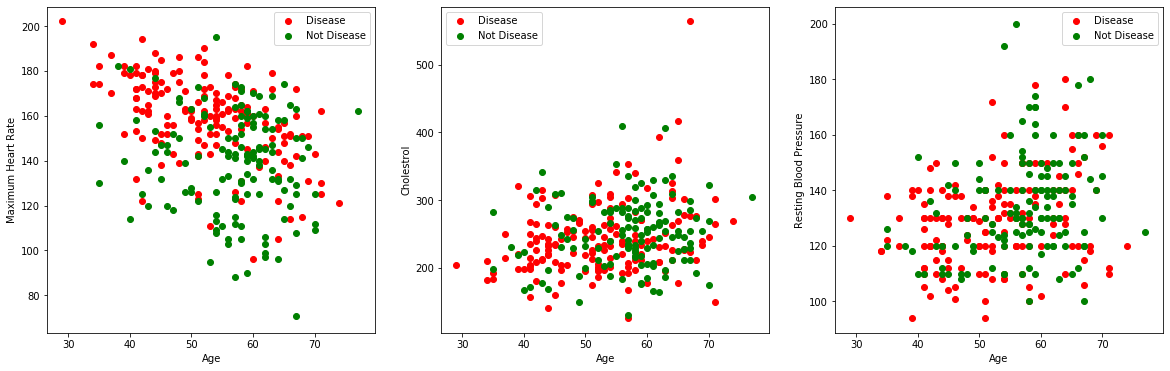

In [81]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.scatter(x = df.age[df.target==1], y = df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")

plt.subplot(1,3,2)
plt.scatter(x=df.age[df.target==1], y=df.chol[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.chol[(df.target==0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Cholestrol")

plt.subplot(1,3,3)
plt.scatter(x=df.age[df.target==1], y=df.trestbps[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.trestbps[(df.target==0)], c='green')
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")

plt.show()

In [82]:
dummy = pd.get_dummies(df['cp'], prefix='cp')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [83]:
dummy = pd.get_dummies(df['sex'], prefix='sex')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [84]:
dummy = pd.get_dummies(df['exang'], prefix='exang')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [85]:
dummy = pd.get_dummies(df['restecg'], prefix='restecg')
dummy.head()
df = pd.concat([df, dummy], axis=1)

In [86]:
df = df.drop(columns=['sex', 'cp', 'exang', 'restecg'])

In [87]:
df.head()

,age,trestbps,chol,fbs,thalach,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,sex_0,sex_1,exang_0,exang_1,restecg_0,restecg_1
0,63,145,233,1,150,2.3,0,0,1,1,0,0,0,1,0,1,1,0,1,0
1,37,130,250,0,187,3.5,0,0,2,1,0,0,1,0,0,1,1,0,0,1
2,41,130,204,0,172,1.4,2,0,2,1,0,1,0,0,1,0,1,0,1,0
3,56,120,236,0,178,0.8,2,0,2,1,0,1,0,0,0,1,1,0,0,1
4,57,120,354,0,163,0.6,2,0,2,1,1,0,0,0,1,0,0,1,0,1


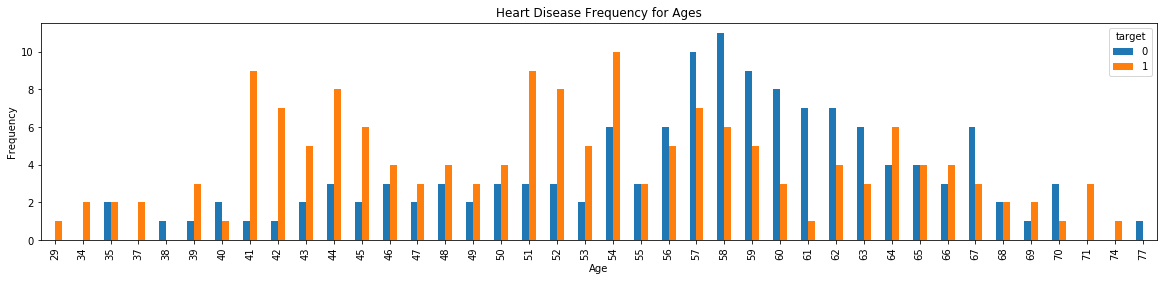

In [88]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,4))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

### By looking at the plot we can make bins for ages

In [89]:
Y = df['target']
X = df.drop(columns='target')

In [90]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

### K-Nearest Neighbours

In [92]:
scores = []
num_k = 100
for i in range(1, num_k):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

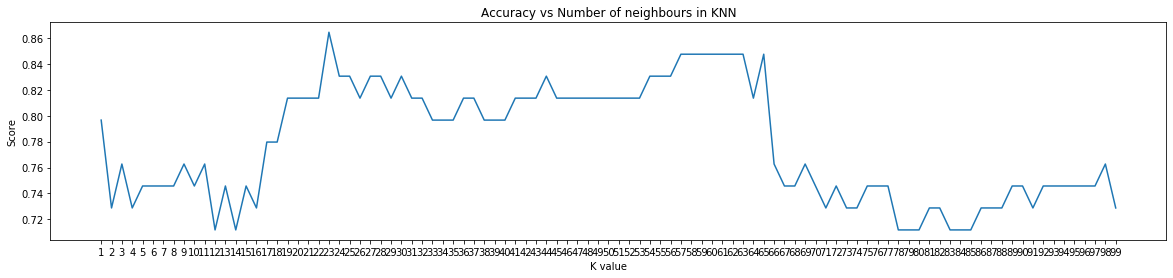

In [93]:
plt.figure(figsize=(20,4))
plt.plot(range(1,num_k), scores)
plt.xticks(np.arange(1,num_k,1))
plt.title('Accuracy vs Number of neighbours in KNN')
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [94]:
print("Maximum accuracy of {ac} achieved at k = {sc}".format(sc = scores.index(max(scores)) + 1, ac = max(scores)))

Maximum accuracy of 0.864406779661017 achieved at k = 23


In [95]:
best_k = scores.index(max(scores)) + 1

### Random Forest Classifier

In [96]:
scores = []
num_k = 150
for i in range(100, num_k):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

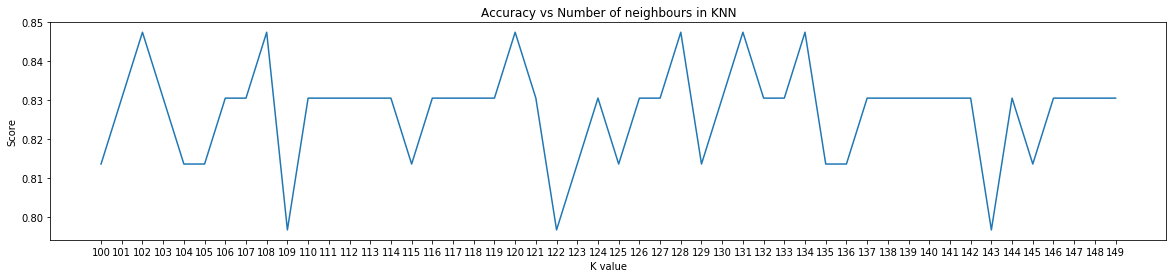

In [97]:
plt.figure(figsize=(20,4))
plt.plot(range(100,num_k), scores)
plt.xticks(np.arange(100,num_k,1))
plt.title('Accuracy vs Number of neighbours in KNN')
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [98]:
print("Maximum accuracy of {ac} achieved at no of estimators = {sc}".format(sc = scores.index(max(scores)) + 100, ac = max(scores)))

Maximum accuracy of 0.847457627118644 achieved at no of estimators = 102


In [99]:
n_est_rf = scores.index(max(scores)) + 100

### Gradient Boosting Machine

In [100]:
scores = []
num_k = 150
for i in range(100, num_k):
    clf = GradientBoostingClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

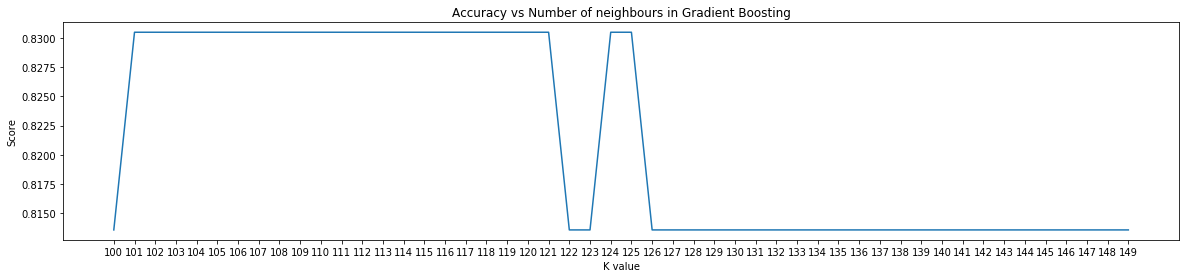

In [101]:
plt.figure(figsize=(20,4))
plt.plot(range(100,num_k), scores)
plt.xticks(np.arange(100,num_k,1))
plt.title('Accuracy vs Number of neighbours in Gradient Boosting')
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [102]:
print("Maximum accuracy of {ac} achieved at no of estimators = {sc}".format(sc = scores.index(max(scores)) + 100, ac = max(scores)))

Maximum accuracy of 0.8305084745762712 achieved at no of estimators = 101


In [103]:
n_est_gb = scores.index(max(scores)) + 100

### SVM (Support Vector Machine)

In [104]:
scores = []
num_k = 200
for i in np.arange(0.1, 1.1, 0.1):
#     print(i)
    clf = SVC(C=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

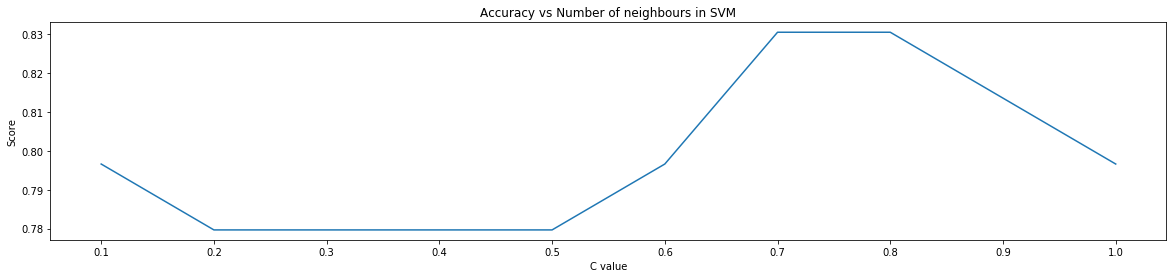

In [105]:
plt.figure(figsize=(20,4))
plt.plot(np.arange(0.1, 1.1, 0.1), scores)
plt.xticks(np.arange(0.1,1.1,0.1))
plt.title('Accuracy vs Number of neighbours in SVM')
plt.xlabel("C value")
plt.ylabel("Score")
plt.show()

In [106]:
print("Maximum accuracy of {ac} achieved at C = {sc}".format(sc = np.arange(0.1, 1.1, 0.1)[scores.index(max(scores))], ac = max(scores)))

Maximum accuracy of 0.8305084745762712 achieved at C = 0.7000000000000001


In [107]:
svm_C = np.arange(0.1, 1.1, 0.1)[scores.index(max(scores))]

### Multi layered Perceptron (Neural Network)

In [108]:
scores = []
num_k = 3000
for i in np.arange(200, num_k, 200):
#     print(i)
    clf = MLPClassifier(max_iter=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)

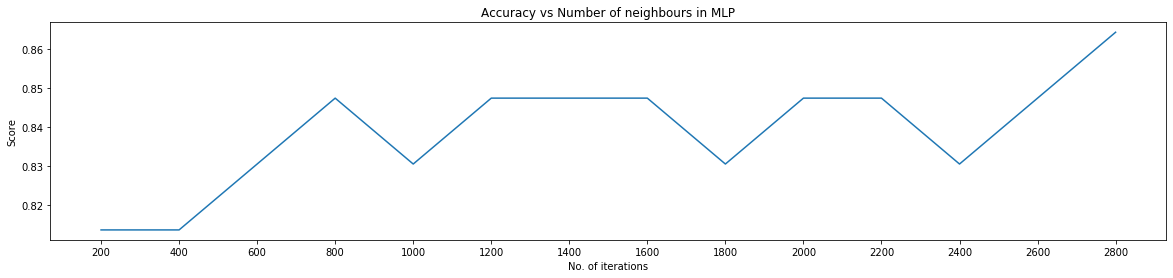

In [109]:
plt.figure(figsize=(20,4))
plt.plot(np.arange(200, num_k, 200), scores)
plt.xticks(np.arange(200, num_k, 200))
plt.title('Accuracy vs Number of neighbours in MLP')
plt.xlabel("No. of iterations")
plt.ylabel("Score")
plt.show()

In [110]:
print("Maximum accuracy of {ac} achieved at number of iter = {sc}".format(sc = np.arange(200, num_k, 200)[scores.index(max(scores))], ac = max(scores)))

Maximum accuracy of 0.864406779661017 achieved at number of iter = 2800


In [111]:
mlp_max_iter = np.arange(200, num_k, 100)[scores.index(max(scores))]

## Comparing Algorithms

In [112]:
clfs = []
clfs.append(("Logistic Regression", LogisticRegression(random_state=0)))
clfs.append(("Random Forest", RandomForestClassifier(n_estimators=n_est_rf)))
clfs.append(("Naive Bayes", BernoulliNB()))
clfs.append(("Gradient Boosting", GradientBoostingClassifier(n_estimators=n_est_gb)))
clfs.append(("KNN", KNeighborsClassifier(n_neighbors=best_k)))
clfs.append(("SVM", SVC(C=svm_C)))
clfs.append(("MLP", MLPClassifier(max_iter=mlp_max_iter)))

In [113]:
models = []
scores = []
for i in clfs:
    models.append(i[0])
    clf = i[1]
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    scores.append(score)
    print(i[0], " : ", score)

Logistic Regression  :  0.8135593220338984
Random Forest  :  0.8305084745762712
Naive Bayes  :  0.7288135593220338
Gradient Boosting  :  0.8305084745762712
KNN  :  0.864406779661017
SVM  :  0.8305084745762712
MLP  :  0.8305084745762712


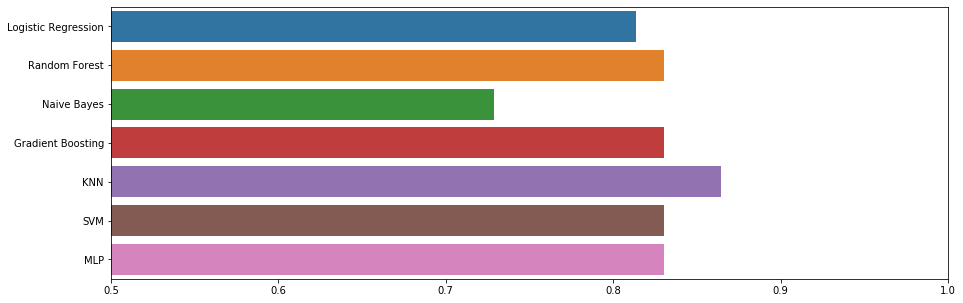

In [114]:
plt.figure(figsize=(15,5))
plt.xlim(0.50, 1.0)
sns.barplot(y=models, x=scores)

## Feature Importance

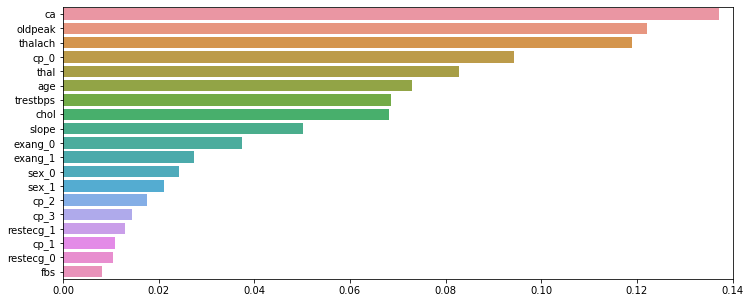

In [115]:
clf = RandomForestClassifier(n_estimators=108)
clf.fit(X_train, y_train)
plt.figure(figsize=(12,5))
plt.xlim(0.0, 0.14)
d = {}
for i in range(19):
    d[X_train.columns[i]] = clf.feature_importances_[i]
import operator
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
sns.barplot(x=list(sorted_d.values()), y=list(sorted_d.keys()))

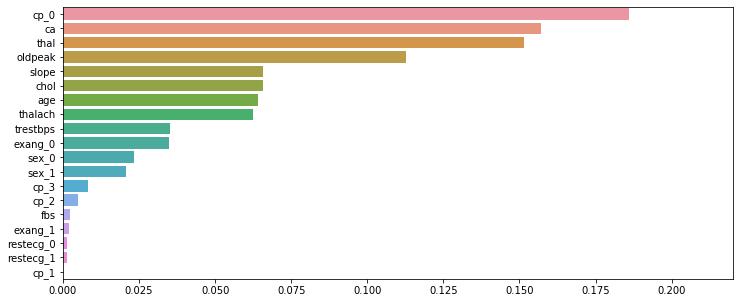

In [116]:
clf = GradientBoostingClassifier(n_estimators=101)
clf.fit(X_train, y_train)
plt.figure(figsize=(12,5))
plt.xlim(0.0, 0.22)
d = {}
for i in range(19):
    d[X_train.columns[i]] = clf.feature_importances_[i]
import operator
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
sns.barplot(x=list(sorted_d.values()), y=list(sorted_d.keys()))